In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import YlOrBr
%matplotlib inline

import xarray

from functions import read_and_prep_parquet

## Style Settings

- cmap="YlOrBr"
- NaN-values: gray
- figsize ratio: height = 480, width = 640
- frame.set_aspect('equal', adjustable='box')
- frame.axes.get_xaxis().set_visible(False)
- frame.axes.get_yaxis().set_visible(False)


# Elevation Data

NOTE: Made two versions just to experiment

In [127]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

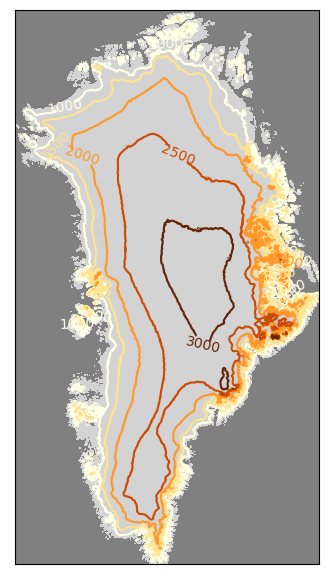

In [29]:
fig = plt.figure(figsize=(6.4*1.5, 4.8*1.5))

c = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0], cmap="YlOrBr",
            levels = list(range(1000, 3001, 500)))
cf = plt.contourf(data_elevation.x, data_elevation.y, data_elevation[0], colors="lightgray", extend='min')
cf.cmap.set_under('gray')
cf.changed()
plt.clabel(c, c.levels, inline=True, fontsize=10)

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Prediction Results

In [3]:
path_dtr_15 =  r"../Data/results/regression/decision_tree/dtr_2019-07-15.tif"
path_lr_15 =  r"../Data/results/regression/linear_regression/lr_2019-07-15.tif"
path_dtc_15 = r"../Data/results/classification/decision_tree_classifier/dtc_multiclass_2019-07-15.tif"
path_logr_15 = r"../Data/results/classification/logistic_regression/logr_multiclass_2019-07-15.tif"

data_dtr_15 = xarray.open_dataarray(path_dtr_15)
data_lr_15 = xarray.open_dataarray(path_lr_15)
data_dtc_15 = xarray.open_dataarray(path_dtc_15)
data_logr_15 = xarray.open_dataarray(path_logr_15)

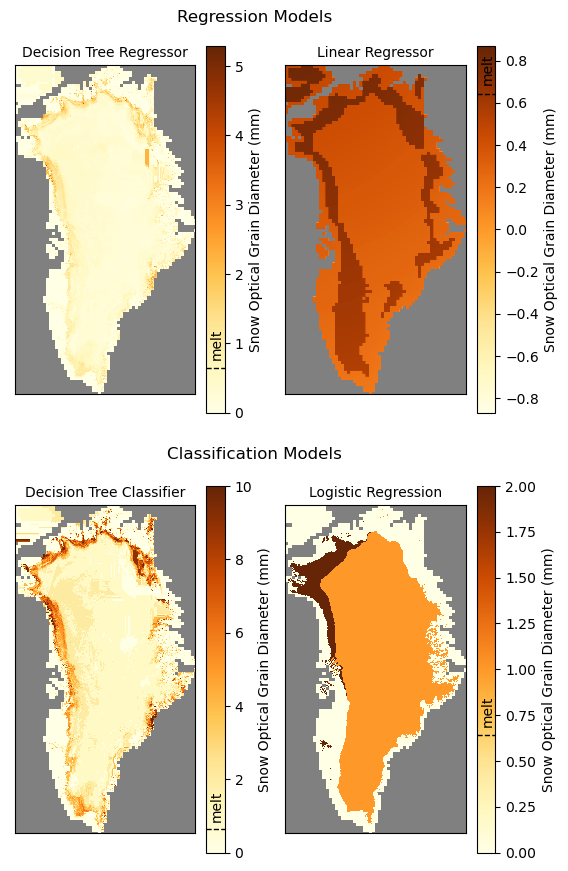

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True,figsize=(6.4, 4.8*2))

masked_array = np.ma.array (data_dtr_15, mask=np.isnan(data_dtr_15))
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}


# Decision Tree Regression for 15.07.2019
p_dtr = data_dtr_15.plot(cmap=cmap, ax=axs[0, 0], cbar_kwargs=cbar_kwargs) 
cbar = p_dtr.colorbar
cbar.ax.annotate('melt', (0.2,0.8), rotation=90, fontsize=10)
# Linear Regression for 15.07.2019
p_lr = data_lr_15.plot(cmap=cmap, ax=axs[0, 1], cbar_kwargs=cbar_kwargs) 
cbar = p_lr.colorbar
cbar.ax.annotate('melt', (0.2,0.7), rotation=90, fontsize=10)
# Decision Tree Classifier for 15.07.2019
p_dtc = data_dtc_15.plot(cmap=cmap, ax=axs[1, 0], cbar_kwargs=cbar_kwargs)  
cbar = p_dtc.colorbar
cbar.ax.annotate('melt', (0.2,0.92), rotation=90, fontsize=10)
# Logistic Regression for 15.07.2019
p_logr = data_logr_15.plot(cmap=cmap, ax=axs[1, 1], cbar_kwargs=cbar_kwargs) 
cbar = p_logr.colorbar
cbar.ax.annotate('melt', (0.2,0.7), rotation=90, fontsize=10)


plots = [p_dtr, p_lr, p_dtc, p_logr]
titles = ["Decision Tree Regressor", "Linear Regressor", "Decision Tree Classifier", "Logistic Regression"]
for idx, plot in enumerate(plots):
    plot.axes.title.set_size(10)
    plot.axes.title.set_text(titles[idx])
    cbar = plot.colorbar
    cbar.ax.axhline(y=0.64, c='black', linestyle='--', linewidth=1)


for idx, ax in enumerate(axs):
    for a in ax:
        a.set_aspect("equal")
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)

plt.suptitle('Regression Models', ha='center', va='center', fontsize=12)
plt.figtext(0.5, 0.525, 'Classification Models', ha='center', va='center', fontsize=12)
fig.subplots_adjust(top=0.95)

plt.show()


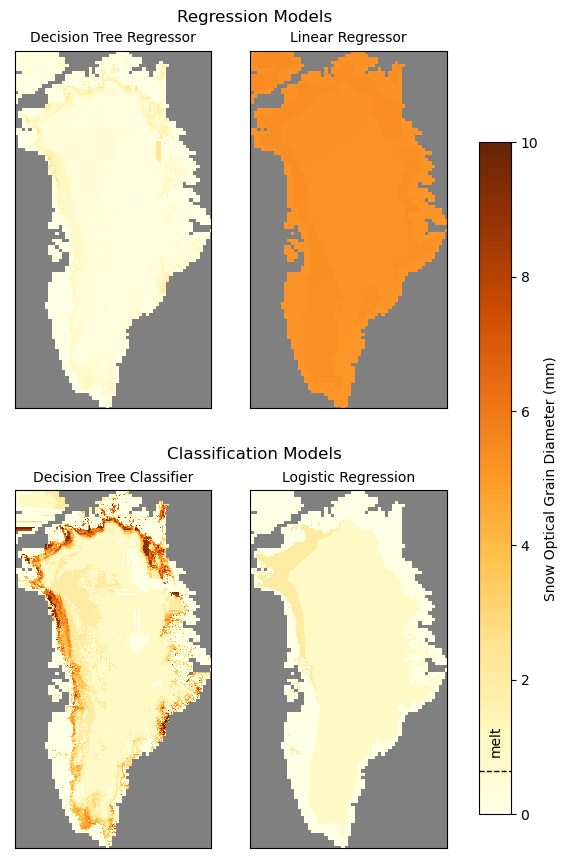

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(6.4, 4.8*2))

masked_array = np.ma.array (data_dtr_15, mask=np.isnan(data_dtr_15))
cmap = YlOrBr
cmap.set_bad('gray',1.)

# Decision Tree Regression for 15.07.2019
p_dtr = data_dtr_15.plot(cmap=cmap, vmax=10, ax=axs[0, 0], add_colorbar=False)
# Linear Regression for 15.07.2019
p_lr = data_lr_15.plot(cmap=cmap, vmax=10, ax=axs[0, 1], add_colorbar=False)
# Decision Tree Classifier for 15.07.2019
p_dtc = data_dtc_15.plot(cmap=cmap, vmax=10, ax=axs[1, 0], add_colorbar=False)
# Logistic Regression for 15.07.2019
p_logr = data_logr_15.plot(cmap=cmap, vmax=10, ax=axs[1, 1], add_colorbar=False)


plots = [p_dtr, p_lr, p_dtc, p_logr]
titles = ["Decision Tree Regressor", "Linear Regressor", "Decision Tree Classifier", "Logistic Regression"]
for idx, plot in enumerate(plots):
    plot.axes.title.set_size(10)
    plot.axes.title.set_text(titles[idx])


for idx, ax in enumerate(axs):
    for a in ax:
        a.set_aspect("equal")
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)

plt.suptitle('Regression Models', ha='center', va='center', fontsize=12)
plt.figtext(0.5, 0.525, 'Classification Models', ha='center', va='center', fontsize=12)
fig.subplots_adjust(top=0.95)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(p_dtc, cax=cbar_ax, label="Snow Optical Grain Diameter (mm)")
cbar.ax.annotate('melt', (0.3,0.9), rotation=90, fontsize=10)
cbar.ax.axhline(y=0.64, c='black', linestyle='--', linewidth=1)

plt.show()

# Prediction follows Elevation Line

In [17]:
path_dtr_15 =  r"../Data/results/regression/decision_tree/dtr_2019-07-15.tif"
path_dtc_15 = r"../Data/results/classification/decision_tree_classifier/dtc_multiclass_2019-07-15.tif"
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"

data_dtr_15 = xarray.open_dataarray(path_dtr_15)
data_dtc_15 = xarray.open_dataarray(path_dtc_15)
data_elevation = xarray.open_dataarray(path_elevation)

data_elevation = data_elevation.where(data_elevation.x <= data_dtr_15.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= data_dtr_15.y.min(), drop=True)     # crop to the same extent (y)

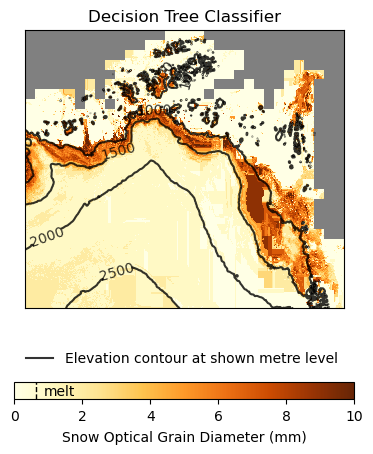

In [25]:
fig = plt.figure()

masked_array = np.ma.array (data_dtr_15, mask=np.isnan(data_dtr_15))
cmap = YlOrBr
cmap.set_bad('gray',1.)


# Prediction Data
p = data_dtc_15[0][:700,400:1200].plot(cmap=cmap, cbar_kwargs={"orientation":"horizontal", "fraction":0.046, "pad":0.2})

axs = plt.gcf().get_axes()
axs[0].set_title("Decision Tree Classifier")
axs[1].set_xlabel("Snow Optical Grain Diameter (mm)", labelpad=5)

# ELevation Data
e = plt.contour(data_elevation.x[400:1200], data_elevation.y[:700], data_elevation[0][:700,400:1200], colors="black", alpha=0.8,
            levels = list(range(1000, 3001, 500)))
plt.clabel(e, e.levels, inline=True, fontsize=10)


proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.8)]
plt.legend(proxy, ["Elevation contour at shown metre level"], loc="lower right", bbox_to_anchor=(1.02, -0.25), frameon=False)


frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

cbar = p.colorbar
cbar.ax.axvline(x=0.64, c='black', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.85, 0.25))

plt.show()

# Box Plot of Snow Grain Diameter vs. Melt Flag

In [ ]:
df_path = r"../Data/combined/pandas_extended/"

datelist = pd.date_range(start="2019-06-01",end="2019-06-30")
datelist = [str(day.date()) for day in datelist]

df_list = []

for day in datelist:
    try: # bc some days are empty
        df = pd.read_parquet(df_path + 'melt_' + day + '_extended.parquet.gzip')[["mw_value", "opt_value"]]
        df_list.append(df)
    except:
        continue

df = pd.concat(df_list, axis=0)
df = df.loc[df["opt_value"] != -1]

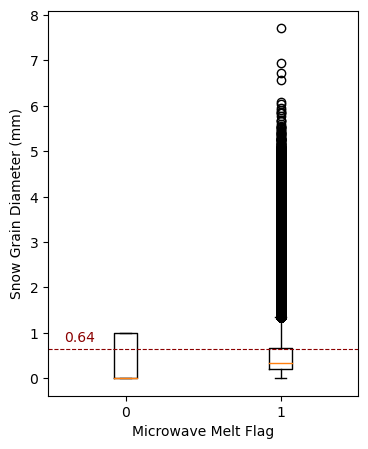

In [42]:
fig = plt.figure(figsize = (4, 5))

plt.boxplot(df[df["opt_value"] <10])

plt.axhline(y=0.64, color='darkred', linestyle='--', linewidth=0.8)
plt.text(0.6,0.8,'0.64', color='darkred')

plt.xticks([1, 2], [0, 1])
plt.xlabel("Microwave Melt Flag")
plt.ylabel("Snow Grain Diameter (mm)")

plt.show()

# Optical Data Set with NaNs filled by Predictions

In [43]:
path_opt_15 = r"../Data/optical-rs/2019-07-15_grain_diameter.tif"
path_dtc_15 = r"../Data/results/classification/decision_tree_classifier/dtc_multiclass_2019-07-15.tif"

data_opt_15 = xarray.open_dataarray(path_opt_15)
data_dtc_15 = xarray.open_dataarray(path_dtc_15)

In [44]:
data_opt_15 = data_opt_15.where(data_opt_15.x <= data_dtc_15.x.max(), drop=True)     # crop to the same extent (x)
data_opt_15 = data_opt_15.where(data_opt_15.y >= data_dtc_15.y.min(), drop=True)     # crop to the same extent (y)

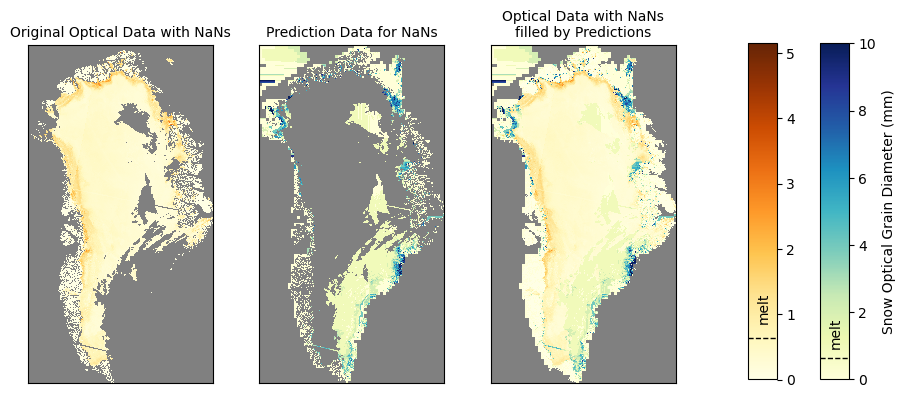

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(6.4*1.5, 4.8), gridspec_kw = {'wspace':0.25, 'hspace':0})
cmap = plt.cm.get_cmap('YlOrBr')
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
cbar_kwargs2={'label': "", "pad":0.2}

# Optical Data for 15.07.2019
p_opt = data_opt_15.plot(cmap=cmap, ax=axs[0], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 

# Decision Tree Classifier where Pred is NaN for 15.07.2019
cmap2 = plt.cm.get_cmap('YlGnBu')
cmap2.set_bad('gray',1.)
p_dtc = data_dtc_15.where(np.isnan(data_opt_15), drop=True).plot(cmap=cmap2, ax=axs[1], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 



# Decision Tree Classifier for 15.07.2019
p_opt2 = data_opt_15.plot(cmap=cmap, ax=axs[2], add_colorbar=False)

p_full = data_dtc_15.where(np.isnan(data_opt_15), drop=True).plot(cmap="YlGnBu",ax=axs[2], add_colorbar=False)


plots = [p_opt, p_dtc, p_full]
titles = ["Original Optical Data with NaNs", "Prediction Data for NaNs", "Optical Data with NaNs\nfilled by Predictions"]
for idx, plot in enumerate(plots):
    plot.axes.title.set_size(10)
    plot.axes.title.set_text(titles[idx])


for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.875, 0.15, 0.03, 0.7])    
cbar = fig.colorbar(p_opt, cax=cbar_ax)
cbar.ax.annotate('melt', (0.3,0.9), rotation=90, fontsize=10)
cbar.ax.axhline(y=0.64, c='black', linestyle='--', linewidth=1)

cbar_ax = fig.add_axes([0.85+0.1, 0.15, 0.03, 0.7])
cbar = fig.colorbar(p_dtc, cax=cbar_ax, label="Snow Optical Grain Diameter (mm)")
cbar.ax.annotate('melt', (0.3,1), rotation=90, fontsize=10)
cbar.ax.axhline(y=0.64, c='black', linestyle='--', linewidth=1)

plt.show()

# OTHER

## Elavation Data + Prediction Data + Microwave Grid

TODO:
- Figure out how to remove elevation data for coastal region (see black fuzzy wuzzy at central east) --> maybe asking Baptiste because he managed for his plots
- Optimize hatch
- Optimize vmax
- Make coastal region gray

NOTE: Check https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html for hatches documentation

In [78]:
path_elevation =  r"../Data/elevation_data/gimpdem_1km_compressed.tif"
data_elevation = xarray.open_dataarray(path_elevation)

data_elevation = data_elevation.where(data_elevation.x <= data_pred.x.max(), drop=True)     # crop to the same extent (x)
data_elevation = data_elevation.where(data_elevation.y >= data_pred.y.min(), drop=True)     # crop to the same extent (y)

In [79]:
data_mw_path = "../Data/microwave-rs/mw_interpolated/2019-07-01_mw.tif"
data_mw = xarray.open_dataarray(data_mw_path)
data_mw = data_mw.where(data_mw == 1, drop=True)

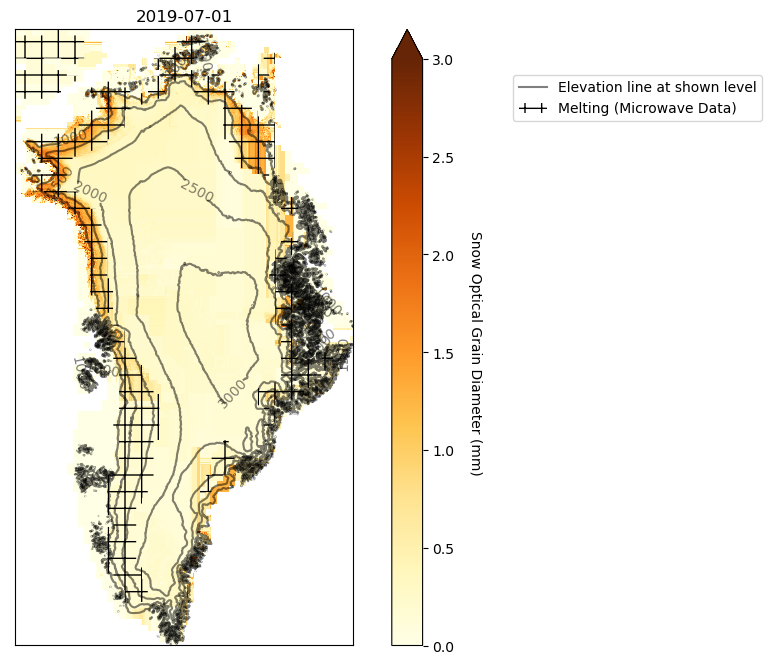

In [244]:
fig = plt.figure(figsize = (10, 8))


# Prediction Data
p = data_pred.plot(cmap="YlOrBr", vmax=3, label="Snow Optical Grain Diameter (mm)")   # set max of colorbar = 3 to make melting more clear as most values are below 3 
axs = plt.gcf().get_axes()
axs[0].set_title("2019-07-01")
axs[1].set_ylabel("Snow Optical Grain Diameter (mm)", rotation=270, labelpad=20)

# ELevation Data
e = plt.contour(data_elevation.x, data_elevation.y, data_elevation[0] , colors="black", alpha=0.5,
            levels = list(range(1000, 3001, 500)))
plt.clabel(e, e.levels, inline=True, fontsize=10)

# Microwave Data
m = plt.contourf(data_mw.x, data_mw.y, data_mw[0], hatches=["+"], alpha=0)

# mpatches.Patch(facecolor="black",alpha=0,hatch="++")
proxy = [plt.Line2D([0,1], [0,1], color="black", alpha=0.5), plt.Rectangle((0,1), 1, 1, facecolor="white", alpha=0, hatch="+")]
plt.legend(proxy, ["Elevation line at shown level", "Melting (Microwave Data)"], loc="lower right", bbox_to_anchor=(2.23,0.84))

frame = plt.gca()
frame.set_aspect('equal', adjustable='box')
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)